# Create a New Environment

In [ ]:
mamba create -n myjlabenv python=3.8 jupyterlab -c conda-forge
mamba activate myjlabenv
jupyter lab

# Install packages

In [2]:
!pip install pandas

  Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 7.2 MB/s eta 0:00:00m eta 0:00:010:00:01
Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.0 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 5.2 MB/s eta 0:00:007.1 MB/s eta 0:00:01


# Read file

In [39]:
import pandas as pd
import re

# Define a function to parse each line of the log file
def parse_log_line(line):
    pattern = r'([^\s]+) - - \[(.*?)\] "(.*?)" (\d{3}) (\d+)$'
    match = re.search(pattern, line)
    if match:
        host = match.group(1)
        timestamp = match.group(2)
        filename = match.group(3).split()[1] if len(match.group(3).split()) > 1 else None  # To handle potential bad entries
        http_reply_code = match.group(4)
        bytes_sent = match.group(5)
        return host, timestamp, filename, http_reply_code, int(bytes_sent)
    else:
        return None, None, None, None, None

In [40]:
# Let's first read the contents of the uploaded file to understand its structure and format.
file_path = './datasets/calgary_HTTP'

In [41]:
# Try reading the file with ISO-8859-1 encoding which is more permissive than UTF-8
data = []
with open(file_path, 'r', encoding='ISO-8859-1') as file:
    for line in file:
        parsed_data = parse_log_line(line)
        if all(value is not None for value in parsed_data):  # Ensure no None values are added
            data.append(parsed_data)

# Convert the list to a DataFrame
columns = ['Host', 'Timestamp', 'Filename', 'HTTP_reply_code', 'Bytes']
df = pd.DataFrame(data, columns=columns)

# Convert timestamp to datetime object for easier manipulation
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%d/%b/%Y:%H:%M:%S %z', errors='coerce', utc=True)

# Display the first few rows of the new DataFrame
df.head()

,Host,Timestamp,Filename,HTTP_reply_code,Bytes
0,local,1994-10-24 19:41:41+00:00,index.html,200,150
1,local,1994-10-24 19:41:41+00:00,1.gif,200,1210
2,local,1994-10-24 19:43:13+00:00,index.html,200,3185
3,local,1994-10-24 19:43:14+00:00,2.gif,200,2555
4,local,1994-10-24 19:43:15+00:00,3.gif,200,36403


In [42]:
# Removing 'Host' and 'Filename' columns from the DataFrame
df = df.drop(['Host', 'Filename'], axis=1)

In [43]:
# Display the updated DataFrame without 'Host' and 'Filename'
df.head(20)

,Timestamp,HTTP_reply_code,Bytes
0,1994-10-24 19:41:41+00:00,200,150
1,1994-10-24 19:41:41+00:00,200,1210
2,1994-10-24 19:43:13+00:00,200,3185
3,1994-10-24 19:43:14+00:00,200,2555
4,1994-10-24 19:43:15+00:00,200,36403
5,1994-10-24 19:43:17+00:00,200,441
6,1994-10-24 19:46:45+00:00,200,3185
7,1994-10-24 19:46:45+00:00,200,2555
8,1994-10-24 19:46:47+00:00,200,36403
9,1994-10-24 19:46:50+00:00,200,441


# drop all of NA values

In [44]:
# Drop all NA values
df.dropna(inplace=True)

# Filter the dataset to only keep records from 1994-10-24
filtered_df = df[df['Timestamp'].dt.date == pd.to_datetime('1994-10-24').date()]

# Display the resulting DataFrame
filtered_df.head()

,Timestamp,HTTP_reply_code,Bytes
0,1994-10-24 19:41:41+00:00,200,150
1,1994-10-24 19:41:41+00:00,200,1210
2,1994-10-24 19:43:13+00:00,200,3185
3,1994-10-24 19:43:14+00:00,200,2555
4,1994-10-24 19:43:15+00:00,200,36403


# 

# Check for Stationarity
https://www.analyticsvidhya.com/blog/2021/08/vector-autoregressive-model-in-python/
https://gist.github.com/kevincdurand1/e8307dfb3e370ca15bdbb97300037c71

In [13]:
!pip install statsmodels

  Using cached scipy-1.13.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 6.5 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 9.0 MB/s eta 0:00:00
Using cached scipy-1.13.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.2 MB)


In [45]:
from statsmodels.tsa.stattools import adfuller

In [46]:
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)
    for key,val in result[4].items():
        out[f'critical value ({key})']=val
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [47]:
adf_test(filtered_df['HTTP_reply_code'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -9.961431e+00
p-value                 2.367901e-17
# lags used             3.000000e+00
# observations          4.570000e+02
critical value (1%)    -3.444740e+00
critical value (5%)    -2.867885e+00
critical value (10%)   -2.570150e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [48]:
adf_test(filtered_df['Bytes'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -3.762756
p-value                   0.003312
# lags used              11.000000
# observations          449.000000
critical value (1%)      -3.444998
critical value (5%)      -2.867999
critical value (10%)     -2.570210
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


# line chart

In [11]:
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.5/159.5 kB 2.6 MB/s eta 0:00:00 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 15.2 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.2/309.2 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 18.9 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 14.8 MB/s eta 0:00:0031m17.7 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 15.8 MB/s eta 0:00:00 MB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 8.9 MB/s eta 0:00:00


/tmp/ipykernel_8985/1053960319.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['HTTP_reply_code'] = filtered_df['HTTP_reply_code'].astype(int)


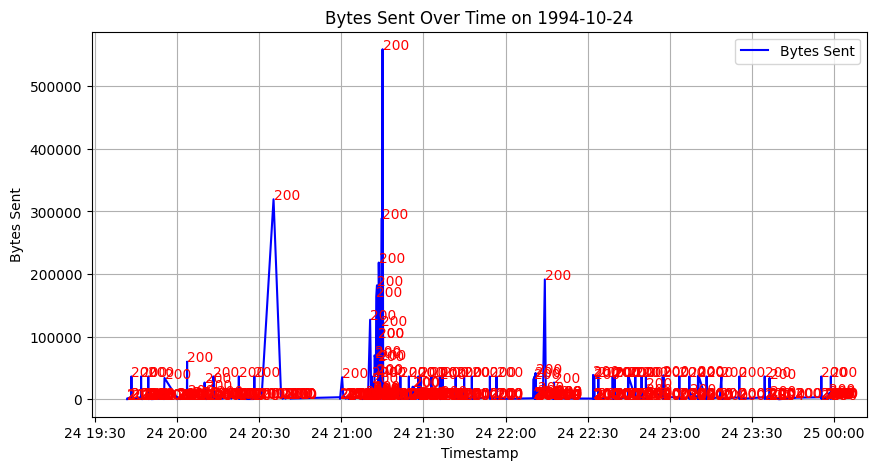

In [49]:
import matplotlib.pyplot as plt

# Converting 'HTTP_reply_code' to integer for plotting
filtered_df['HTTP_reply_code'] = filtered_df['HTTP_reply_code'].astype(int)

# Plotting the line chart
plt.figure(figsize=(10, 5))
plt.plot(filtered_df['Timestamp'], filtered_df['Bytes'], label='Bytes Sent', color='blue')
plt.title('Bytes Sent Over Time on 1994-10-24')
plt.xlabel('Timestamp')
plt.ylabel('Bytes Sent')
plt.grid(True)

# Adding HTTP reply codes as text labels to the plot for better clarity
for idx, row in filtered_df.iterrows():
    plt.text(row['Timestamp'], row['Bytes'], str(row['HTTP_reply_code']), color='red')

plt.legend()
plt.show()


# Train-Test Split

In [50]:
test_obs = 12
train = filtered_df[:-test_obs]
test = filtered_df[-test_obs:]

# Vector AutoRegressive Model (VAR)

## Grid Search for Order P

In [51]:
from statsmodels.tsa.vector_ar.var_model import VAR
import numpy as np

# Define the range of lag orders to test
max_lags = 15
results_aic = []

# Fit VAR model for each lag order and store the AIC
for p in range(1, max_lags + 1):
    model = VAR(train[['Bytes', 'HTTP_reply_code']])
    result = model.fit(maxlags=p)
    results_aic.append((p, result.aic))

# Find the order p with the lowest AIC
best_p = sorted(results_aic, key=lambda x: x[1])[0]

best_p, results_aic

((2, 25.32996956384271),
 [(1, 25.491057429537808),
  (2, 25.32996956384271),
  (3, 25.334787940413957),
  (4, 25.33939006446994),
  (5, 25.354081847631534),
  (6, 25.37401196003988),
  (7, 25.37254328178693),
  (8, 25.39434072421063),
  (9, 25.414533549755443),
  (10, 25.437104616022275),
  (11, 25.451880608713413),
  (12, 25.456106239792746),
  (13, 25.478398964051596),
  (14, 25.500092797716498),
  (15, 25.520377095879496)])

## Fit VAR(2) Model

In [52]:
result = model.fit(2)
result.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 30, Apr, 2024
Time:                     01:54:27
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    25.4217
Nobs:                     447.000    HQIC:                   25.3662
Log likelihood:          -6919.78    FPE:                1.00154e+11
AIC:                      25.3300    Det(Omega_mle):     9.79501e+10
--------------------------------------------------------------------
Results for equation Bytes
                        coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------
const                  37043.392609     61747.033034            0.600           0.549
L1.Bytes                   0.063320         0.045990            1.377           0.169
L1.HTTP_reply_code       -67.387914     

## Predict Test Data

In [53]:
# Forecasting 12 steps ahead which corresponds to the length of the test set
lag_order = result.k_ar
forecast_input = train[['Bytes', 'HTTP_reply_code']].values[-lag_order:]
forecast = result.forecast(y=forecast_input, steps=len(test))

# Creating a DataFrame for the forecasted values
forecast_df = pd.DataFrame(forecast, index=test.index, columns=['Bytes_forecast', 'HTTP_reply_code_forecast'])

# Combining the forecasted values with the actual test data for comparison
test_forecasted = pd.concat([test, forecast_df], axis=1)
test_forecasted


,Timestamp,HTTP_reply_code,Bytes,Bytes_forecast,HTTP_reply_code_forecast
449,1994-10-24 23:57:41+00:00,200,1161,9490.671995,200.445012
450,1994-10-24 23:57:46+00:00,200,2904,9427.762991,200.403082
451,1994-10-24 23:58:03+00:00,200,709,11607.471603,200.605558
452,1994-10-24 23:58:06+00:00,200,6627,11718.907068,200.584082
453,1994-10-24 23:58:13+00:00,200,2323,12269.025271,200.664496
454,1994-10-24 23:58:18+00:00,200,9585,12328.503639,200.656177
455,1994-10-24 23:58:54+00:00,200,3185,12467.337411,200.686045
456,1994-10-24 23:58:54+00:00,200,2555,12489.927509,200.683151
457,1994-10-24 23:58:55+00:00,200,36403,12524.784435,200.693823
458,1994-10-24 23:58:56+00:00,200,441,12532.258075,200.692866


## Plot the Result

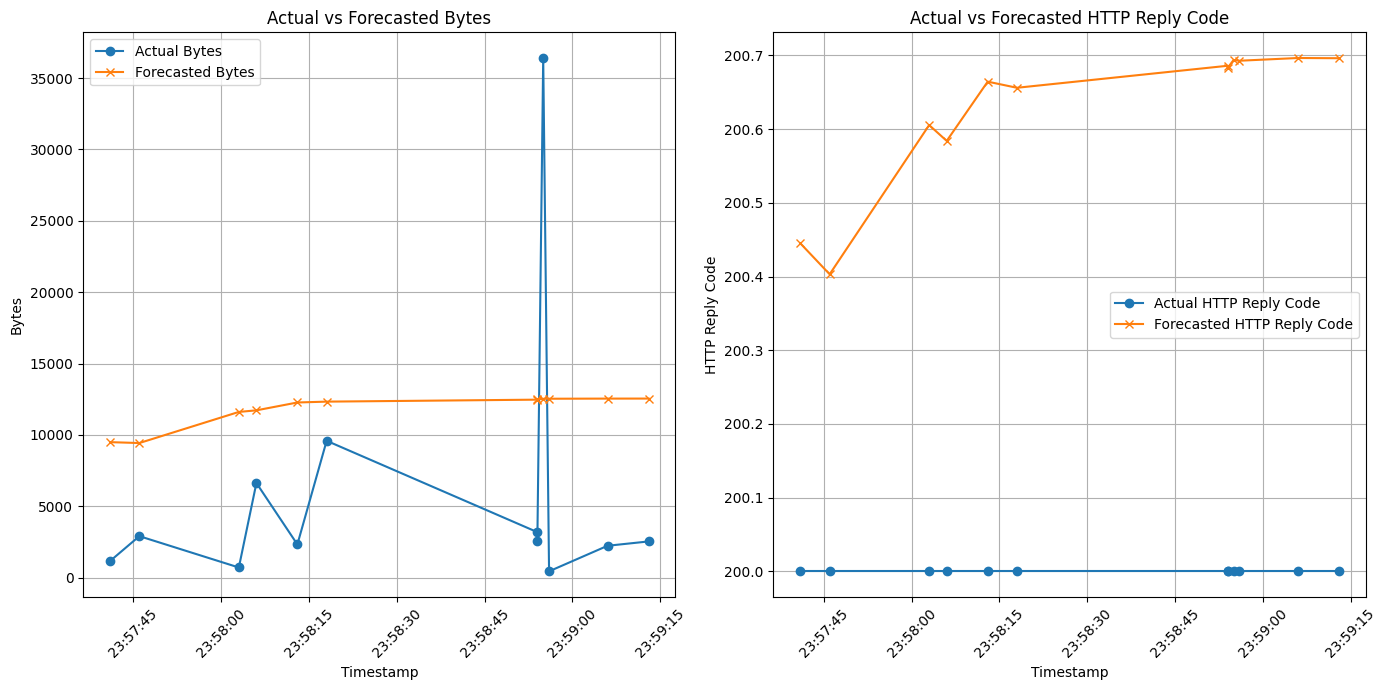

In [54]:
# Plotting the actual vs forecasted values for 'Bytes' and 'HTTP_reply_code'
plt.figure(figsize=(14, 7))

# Plot for 'Bytes'
plt.subplot(1, 2, 1)
plt.plot(test['Timestamp'], test['Bytes'], label='Actual Bytes', marker='o')
plt.plot(test['Timestamp'], forecast_df['Bytes_forecast'], label='Forecasted Bytes', marker='x')
plt.title('Actual vs Forecasted Bytes')
plt.xlabel('Timestamp')
plt.ylabel('Bytes')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Plot for 'HTTP_reply_code'
plt.subplot(1, 2, 2)
plt.plot(test['Timestamp'], test['HTTP_reply_code'], label='Actual HTTP Reply Code', marker='o')
plt.plot(test['Timestamp'], forecast_df['HTTP_reply_code_forecast'], label='Forecasted HTTP Reply Code', marker='x')
plt.title('Actual vs Forecasted HTTP Reply Code')
plt.xlabel('Timestamp')
plt.ylabel('HTTP Reply Code')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


## mean absolute error

In [55]:
def mean_absolute_error(actual, predicted):
    return sum(abs(a - p) for a, p in zip(actual, predicted)) / len(actual)

In [57]:
mae = mean_absolute_error(test_forecasted["Bytes"], test_forecasted["Bytes_forecast"])
print("Mean Absolute Error:", mae)

Mean Absolute Error: 9919.930255069301


# Large Bayesian vector auto regressions (BVARs)

##  Install PyMC3

In [63]:
!mamba install pymc3 -c conda-forge


Looking for: ['pymc3']

error    libmamba Could not open lockfile '/opt/mambaforge/pkgs/cache/cache.lock'
error    libmamba Could not open lockfile '/opt/mambaforge/pkgs/cache/cache.lock'
[+] 0.0s
[+] 0.1s
conda-forge/linux-64 ━━━━━╸━━━━━━━━━━━━━━━╸━   0.0 B /  ??.?MB @  ??.?MB/s  0.1s
conda-forge/noarch   ━━━━━━━━━━━╸━━━━━━━━━━━   0.0 B /  ??.?MB @  ??.?MB/s  0.1s[+] 0.2s
conda-forge/linux-64 ━━━━━━╸━━━━━━━━━━━━━━━━   0.0 B /  ??.?MB @  ??.?MB/s  0.2s
conda-forge/noarch   ━━━━━━━━━━━━╸━━━━━━━━━━   0.0 B /  ??.?MB @  ??.?MB/s  0.2s[+] 0.3s
conda-forge/linux-64 ━━━━━━━╸━━━━━━━━━━━━━━━   0.0 B /  ??.?MB @  ??.?MB/s  0.3s
conda-forge/noarch   ━━━━━━━━━━━━━╸━━━━━━━━━   0.0 B /  ??.?MB @  ??.?MB/s  0.3s[+] 0.4s
conda-forge/linux-64 ━━━━━━━╸━━━━━━━━━━━━━━━   0.0 B /  ??.?MB @  ??.?MB/s  0.4s
conda-forge/noarch   ━━━━━━━━━━━━━╸━━━━━━━━━   0.0 B /  ??.?MB @  ??.?MB/s  0.4s[+] 0.5s
conda-forge/linux-64 ━━━━━━━╸━━━━━━━━━━━━━━━   0.0 B /  ??.?MB @  ??.?MB/s  0.5s
conda-forge/noarch   ━━━━━━━━━━━

In [64]:
import pymc3
print(pymc3.__version__)


ModuleNotFoundError: No module named 'pymc3'